CLAHE & Median Filter Preprocessed Method with PSNR Value

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
def calculate_psnr(original, processed):
    mse = np.mean((original.astype(np.float32) - processed.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))


In [4]:
def preprocess_and_save(image_path, save_path, show_sample=False):
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original is None:
        print(f"❌ Failed to load: {image_path}")
        return None, None

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=0.01, tileGridSize=(8, 8))
    img_clahe = clahe.apply(original)

    # Apply Median Filter
    img_combined = cv2.medianBlur(img_clahe, 1)

    # Save image
    cv2.imwrite(save_path, img_combined)
    print(f"✅ Saved: {save_path}")

    # PSNR
    psnr = calculate_psnr(original, img_combined)

    # Display one sample
    if show_sample:
        img_median = cv2.medianBlur(original, 1)
        plt.figure(figsize=(16, 4))
        plt.subplot(1, 4, 1); plt.imshow(original, cmap='gray'); plt.title("Original"); plt.axis('off')
        plt.subplot(1, 4, 2); plt.imshow(img_clahe, cmap='gray'); plt.title("CLAHE"); plt.axis('off')
        plt.subplot(1, 4, 3); plt.imshow(img_median, cmap='gray'); plt.title("Median"); plt.axis('off')
        plt.subplot(1, 4, 4); plt.imshow(img_combined, cmap='gray'); plt.title("CLAHE + Median"); plt.axis('off')
        plt.suptitle(os.path.basename(image_path))
        plt.show()

    return os.path.basename(save_path), psnr


In [5]:
# Step 5: Main Pipeline Function
def run_preprocessing_pipeline(input_base, output_base, psnr_csv_path):
    sets = ["Training Data", "Testing Data", "Validation Data"]
    classes = ["Normal", "Bacterial Pneumonia", "Viral Pneumonia"]
    psnr_records = []
    grand_total = 0

    for dataset in sets:
        print(f"\n📁 Dataset: {dataset}")
        dataset_total = 0

        for cls in classes:
            input_dir = os.path.join(input_base, dataset, cls)
            output_dir = os.path.join(output_base, dataset, cls)
            os.makedirs(output_dir, exist_ok=True)

            files = sorted([f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            class_total = len(files)
            print(f"  📂 {cls}: {class_total} images")

            sample_shown = False
            counter = 1

            for f in files:
                input_path = os.path.join(input_dir, f)

                folder_clean = dataset.replace(" ", "_")
                class_clean = cls.replace(" ", "_")
                method_name = "Clahe_&_Median"
                new_filename = f"{folder_clean}_{class_clean}_{method_name}_{counter:04d}.png"
                output_path = os.path.join(output_dir, new_filename)

                saved_name, psnr = preprocess_and_save(input_path, output_path, show_sample=not sample_shown)
                sample_shown = True

                if saved_name:
                    psnr_records.append({
                        "Dataset": dataset,
                        "Class": cls,
                        "Filename": new_filename,
                        "PSNR": psnr
                    })

                counter += 1

            dataset_total += class_total
            grand_total += class_total

        print(f"🔢 Total in {dataset}: {dataset_total} images")

    print(f"\n✅ Grand Total: {grand_total} images processed across all datasets.\n")

    # Save PSNR records to CSV
    df = pd.DataFrame(psnr_records)
    os.makedirs(os.path.dirname(psnr_csv_path), exist_ok=True)
    df.to_csv(psnr_csv_path, index=False)
    print(f"📄 PSNR CSV saved at: {psnr_csv_path}")



📁 Dataset: Training Data
  📂 Normal: 1159 images
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Normal/Training_Data_Normal_Clahe_&_Median_0001.png


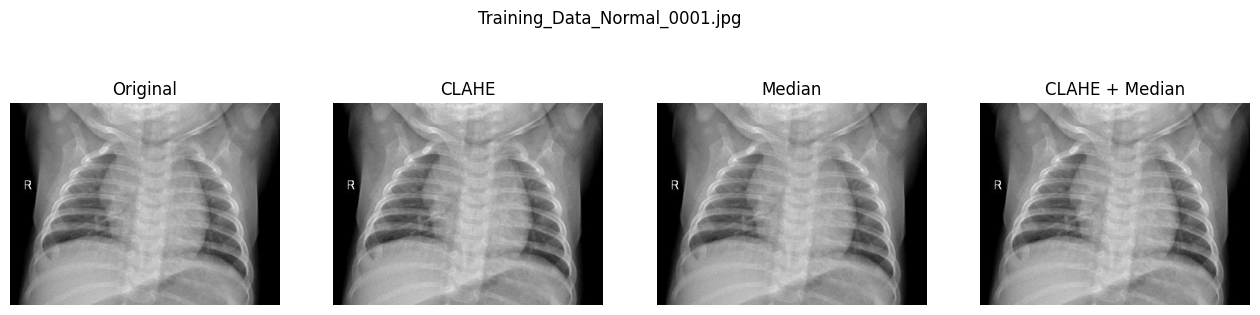

✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Normal/Training_Data_Normal_Clahe_&_Median_0002.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Normal/Training_Data_Normal_Clahe_&_Median_0003.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Normal/Training_Data_Normal_Clahe_&_Median_0004.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Normal/Training_Data_Normal_Clahe_&_Median_0005.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Normal/Training_Data_Normal_Clahe_&_Median_0006.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Normal/Training_Data_Normal_Clahe_&_Me

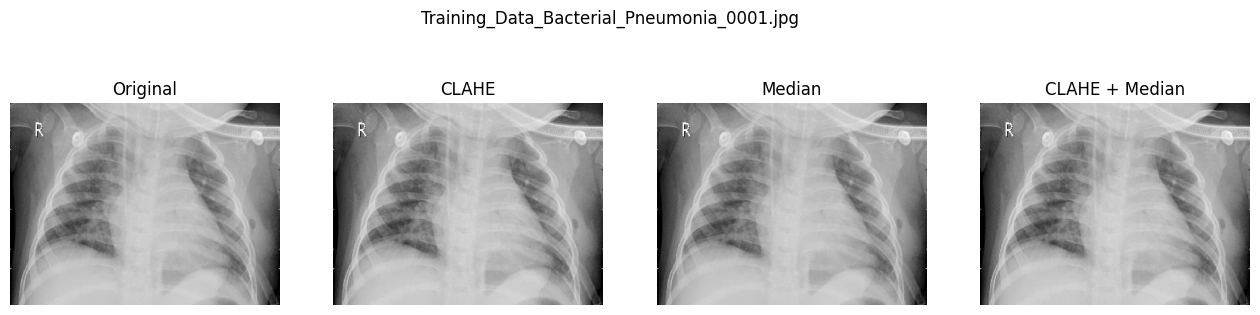

✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Bacterial Pneumonia/Training_Data_Bacterial_Pneumonia_Clahe_&_Median_0002.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Bacterial Pneumonia/Training_Data_Bacterial_Pneumonia_Clahe_&_Median_0003.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Bacterial Pneumonia/Training_Data_Bacterial_Pneumonia_Clahe_&_Median_0004.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Bacterial Pneumonia/Training_Data_Bacterial_Pneumonia_Clahe_&_Median_0005.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Bacterial Pneumonia/Training_Data_Bacterial_Pneumonia_Clahe_&_Median_0006.png
✅ Saved: /content/drive/M

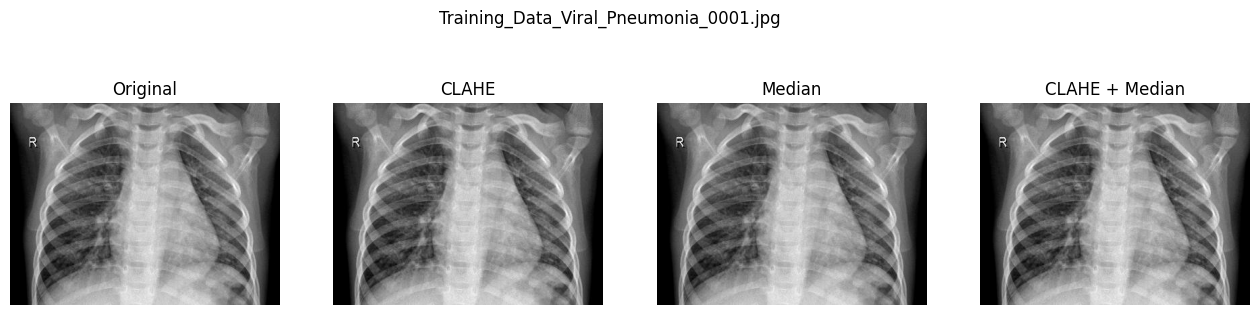

✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Viral Pneumonia/Training_Data_Viral_Pneumonia_Clahe_&_Median_0002.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Viral Pneumonia/Training_Data_Viral_Pneumonia_Clahe_&_Median_0003.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Viral Pneumonia/Training_Data_Viral_Pneumonia_Clahe_&_Median_0004.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Viral Pneumonia/Training_Data_Viral_Pneumonia_Clahe_&_Median_0005.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Training Data/Viral Pneumonia/Training_Data_Viral_Pneumonia_Clahe_&_Median_0006.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE

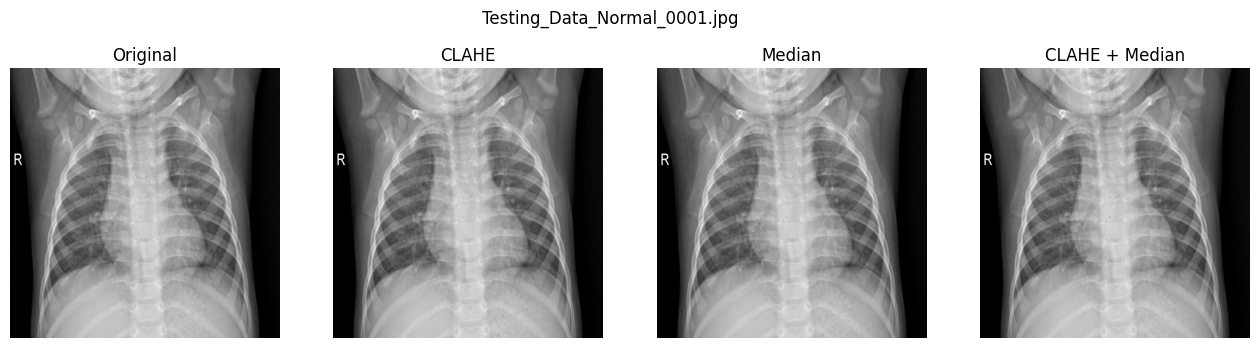

✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Normal/Testing_Data_Normal_Clahe_&_Median_0002.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Normal/Testing_Data_Normal_Clahe_&_Median_0003.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Normal/Testing_Data_Normal_Clahe_&_Median_0004.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Normal/Testing_Data_Normal_Clahe_&_Median_0005.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Normal/Testing_Data_Normal_Clahe_&_Median_0006.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Normal/Testing_Data_Normal_Clahe_&_Median_0007.pn

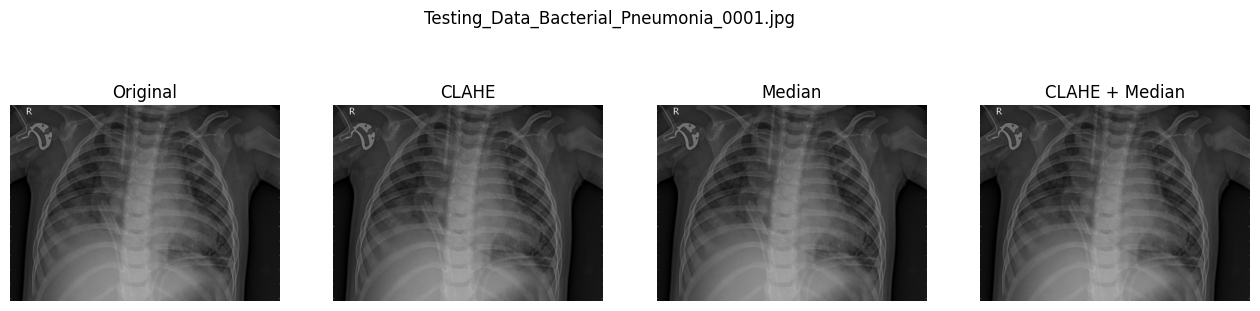

✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Bacterial Pneumonia/Testing_Data_Bacterial_Pneumonia_Clahe_&_Median_0002.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Bacterial Pneumonia/Testing_Data_Bacterial_Pneumonia_Clahe_&_Median_0003.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Bacterial Pneumonia/Testing_Data_Bacterial_Pneumonia_Clahe_&_Median_0004.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Bacterial Pneumonia/Testing_Data_Bacterial_Pneumonia_Clahe_&_Median_0005.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Bacterial Pneumonia/Testing_Data_Bacterial_Pneumonia_Clahe_&_Median_0006.png
✅ Saved: /content/drive/MyDrive/Pne

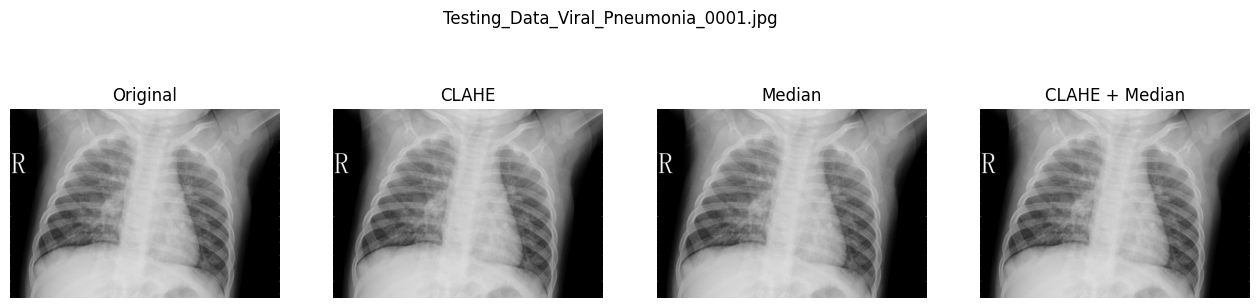

✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Viral Pneumonia/Testing_Data_Viral_Pneumonia_Clahe_&_Median_0002.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Viral Pneumonia/Testing_Data_Viral_Pneumonia_Clahe_&_Median_0003.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Viral Pneumonia/Testing_Data_Viral_Pneumonia_Clahe_&_Median_0004.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Viral Pneumonia/Testing_Data_Viral_Pneumonia_Clahe_&_Median_0005.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Testing Data/Viral Pneumonia/Testing_Data_Viral_Pneumonia_Clahe_&_Median_0006.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median 

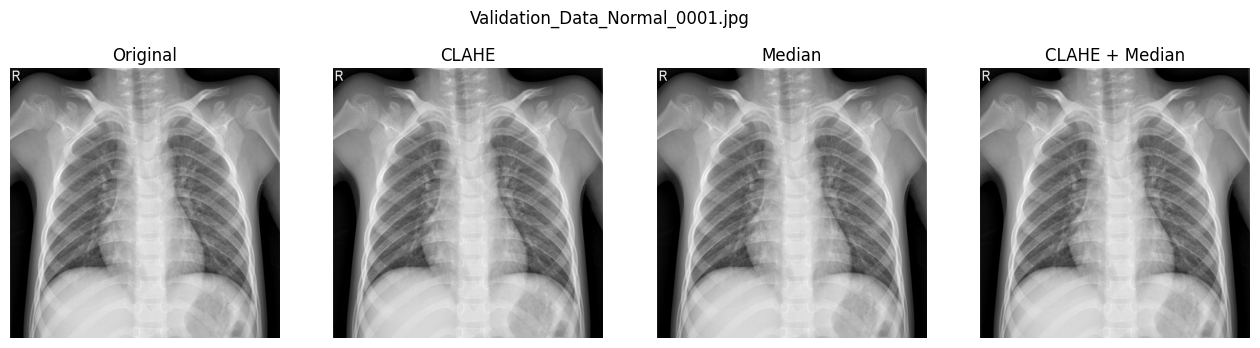

✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Normal/Validation_Data_Normal_Clahe_&_Median_0002.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Normal/Validation_Data_Normal_Clahe_&_Median_0003.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Normal/Validation_Data_Normal_Clahe_&_Median_0004.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Normal/Validation_Data_Normal_Clahe_&_Median_0005.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Normal/Validation_Data_Normal_Clahe_&_Median_0006.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Normal/Validatio

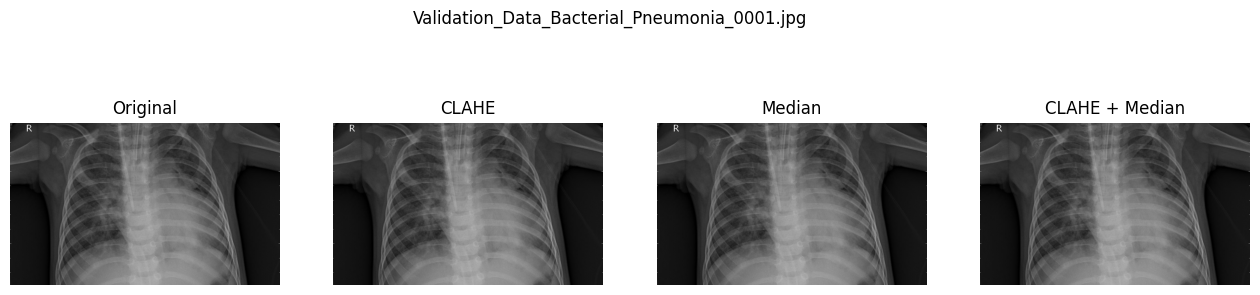

✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Bacterial Pneumonia/Validation_Data_Bacterial_Pneumonia_Clahe_&_Median_0002.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Bacterial Pneumonia/Validation_Data_Bacterial_Pneumonia_Clahe_&_Median_0003.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Bacterial Pneumonia/Validation_Data_Bacterial_Pneumonia_Clahe_&_Median_0004.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Bacterial Pneumonia/Validation_Data_Bacterial_Pneumonia_Clahe_&_Median_0005.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Bacterial Pneumonia/Validation_Data_Bacterial_Pneumonia_Clahe_&_Median_0006.png
✅ Sav

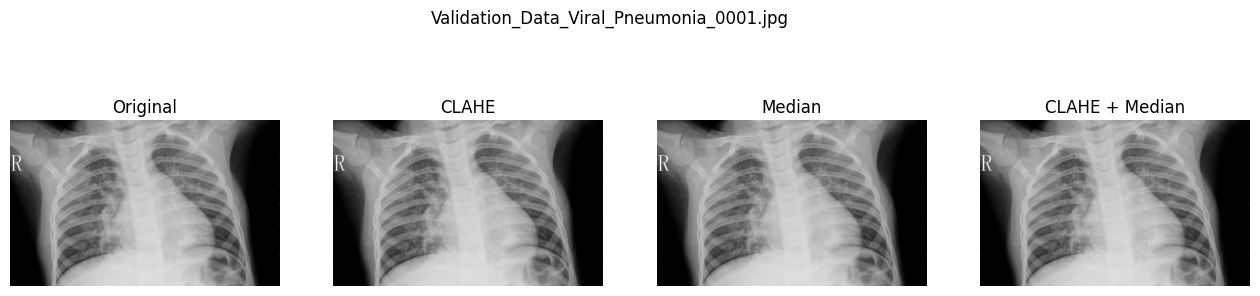

✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Viral Pneumonia/Validation_Data_Viral_Pneumonia_Clahe_&_Median_0002.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Viral Pneumonia/Validation_Data_Viral_Pneumonia_Clahe_&_Median_0003.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Viral Pneumonia/Validation_Data_Viral_Pneumonia_Clahe_&_Median_0004.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Viral Pneumonia/Validation_Data_Viral_Pneumonia_Clahe_&_Median_0005.png
✅ Saved: /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/Validation Data/Viral Pneumonia/Validation_Data_Viral_Pneumonia_Clahe_&_Median_0006.png
✅ Saved: /content/drive/MyDrive/Pneumonia Dis

In [6]:
# Set paths
input_base = "/content/drive/MyDrive/Pneumonia Disease Detection Dataset"
output_base = "/content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset"
psnr_csv_path = os.path.join(output_base, "CLAHE & Median Filter Preprocessed PSNR Value.csv")

# Start processing
run_preprocessing_pipeline(input_base, output_base, psnr_csv_path)


In [7]:
# Step 7: Final Success Message 🎉
print("\n" + "="*60)
print("🎯 All folders and subfolders processed successfully!")
print("📁 Output saved in:")
print(f"   {output_base}")
print("📝 PSNR values saved in:")
print(f"   {psnr_csv_path}")
print("✅ Preprocessing complete. You are now ready for model training!")
print("="*60)



🎯 All folders and subfolders processed successfully!
📁 Output saved in:
   /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset
📝 PSNR values saved in:
   /content/drive/MyDrive/Pneumonia Disease Detection CLAHE & Median Filter Preprocessed Dataset/CLAHE & Median Filter Preprocessed PSNR Value.csv
✅ Preprocessing complete. You are now ready for model training!
